In [1]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf  
from tensorflow import keras 
from tensorflow.keras.layers import Dense, Flatten,Dropout
from tensorflow.keras.models import Sequential  
from tensorflow.keras.regularizers import l2
from tensorflow.keras.datasets import fashion_mnist


In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data() 


In [3]:
x_train = x_train / 255.0 
x_test = x_test / 255.0 
x_train = x_train.reshape(-1, 28 *28 )
x_test = x_test .reshape(-1, 28 *28 )   


In [5]:
def build_base_model():
    model=Sequential([
        Dense(256,activation='relu',input_shape=(784,)),
        Dense(128,activation='relu'),
        Dense(64,activation='relu'),
        Dense(10,activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [6]:
### model with l2 regularization
def build_l2_model():
    model=Sequential([
        Dense(256,activation='relu',input_shape=(784,),kernel_regularizer=l2(0.001)),
        Dense(128,activation='relu',kernel_regularizer=l2(0.001)),
        Dense(64,activation='relu',kernel_regularizer=l2(0.001)),
        Dense(10,activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model 


In [7]:
### Build model with Dropout
def build_dropout_model():
    model=Sequential([
        Dense(256,activation='relu',input_shape=(784,)),
        Dropout(0.5),
        Dense(128,activation='relu'),
        Dropout(0.5),
        Dense(64,activation='relu'),
        Dropout(0.5),
        Dense(10,activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model 


In [8]:
base_model=build_base_model()
l2_model=build_l2_model()
dropout_model=build_dropout_model()


c:\Users\adity\.conda\envs\genai\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
history_base=base_model.fit(
    x_train,y_train,
    epochs=20,
    validation_split=0.2,
    batch_size=32,
    validation_data=(x_test, y_test)
)


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7774 - loss: 0.6246 - val_accuracy: 0.8489 - val_loss: 0.4189
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8620 - loss: 0.3741 - val_accuracy: 0.8427 - val_loss: 0.4116
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8784 - loss: 0.3302 - val_accuracy: 0.8707 - val_loss: 0.3638
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8837 - loss: 0.3132 - val_accuracy: 0.8675 - val_loss: 0.3594
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8942 - loss: 0.2848 - val_accuracy: 0.8779 - val_loss: 0.3445
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8964 - loss: 0.2730 - val_accuracy: 0.8717 - val_loss: 0.3559
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9016 - loss: 0.2573 - val_accuracy: 0.8760 - val_loss: 0.3536
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9069 - loss: 0.2514 - 

In [10]:
history_l2=l2_model.fit(
    x_train,y_train,
    epochs=20,
    validation_split=0.2,
    batch_size=32,
    validation_data=(x_test, y_test)
)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7757 - loss: 0.9920 - val_accuracy: 0.8313 - val_loss: 0.6314
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8459 - loss: 0.5819 - val_accuracy: 0.8434 - val_loss: 0.5550
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8555 - loss: 0.5209 - val_accuracy: 0.8405 - val_loss: 0.5364
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8606 - loss: 0.4884 - val_accuracy: 0.8534 - val_loss: 0.4959
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.8655 - loss: 0.4652 - val_accuracy: 0.8518 - val_loss: 0.4995
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.8687 - loss: 0.4513 - val_accuracy: 0.8502 - val_loss: 0.5027
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8736 - loss: 0.4380 - val_accuracy: 0.8588 - val_loss: 0.4708
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.8739 - loss: 0.4

In [11]:
history = dropout_model.fit(
    x_train,y_train,
    epochs=20,
    validation_split=0.2,
    batch_size=32,
    validation_data=(x_test, y_test)
)


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.5527 - loss: 1.2272 - val_accuracy: 0.7853 - val_loss: 0.5489
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7749 - loss: 0.6331 - val_accuracy: 0.8222 - val_loss: 0.4806
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8076 - loss: 0.5650 - val_accuracy: 0.8337 - val_loss: 0.4572
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8126 - loss: 0.5438 - val_accuracy: 0.8511 - val_loss: 0.4279
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8208 - loss: 0.5251 - val_accuracy: 0.8447 - val_loss: 0.4193
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8283 - loss: 0.4987 - val_accuracy: 0.8509 - val_loss: 0.4102
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8306 - loss: 0.4936 - val_accuracy: 0.8568 - val_loss: 0.3996
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8353 - loss: 0.48

In [12]:
base_accuracy=base_model.evaluate(x_test,y_test,verbose=0)[1]
l2_accuracy=l2_model.evaluate(x_test,y_test,verbose=0)[1]
dropout_accuracy=dropout_model.evaluate(x_test,y_test,verbose=0)[1]
print("****Model accuracies****")
print(f"Base Model Test Accuracy: {base_accuracy*100:.2f}%")
print(f"L2 Regularized Model Test Accuracy: {l2_accuracy*100:.2f}%")
print(f"Dropout Model Test Accuracy: {dropout_accuracy*100:.2f}%")


****Model accuracies****
Base Model Test Accuracy: 89.35%
L2 Regularized Model Test Accuracy: 86.88%
Dropout Model Test Accuracy: 87.01%


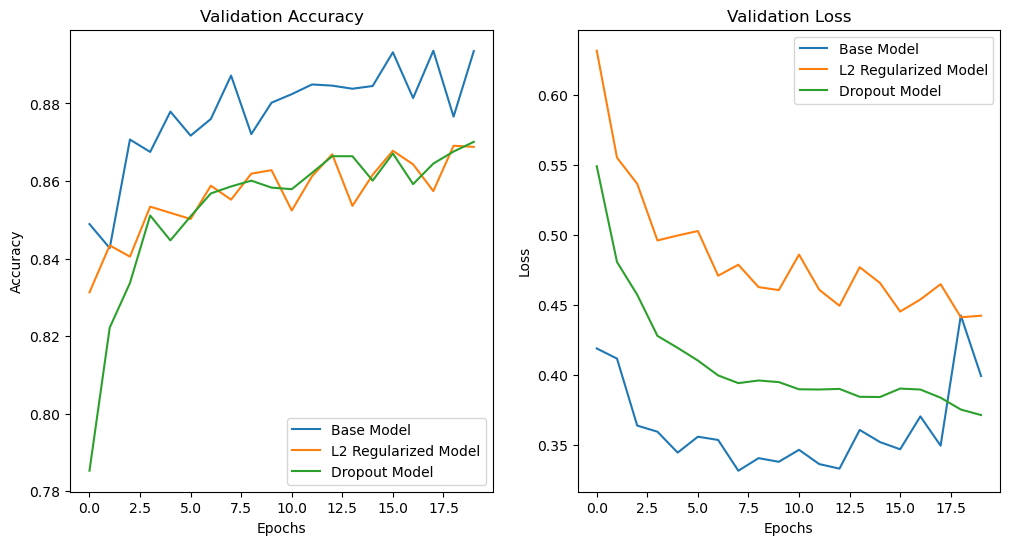

In [13]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_base.history['val_accuracy'], label='Base Model')
plt.plot(history_l2.history['val_accuracy'], label='L2 Regularized Model')
plt.plot(history.history['val_accuracy'], label='Dropout Model')
plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history_base.history['val_loss'], label='Base Model')
plt.plot(history_l2.history['val_loss'], label='L2 Regularized Model')
plt.plot(history.history['val_loss'], label='Dropout Model')
plt.title('Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


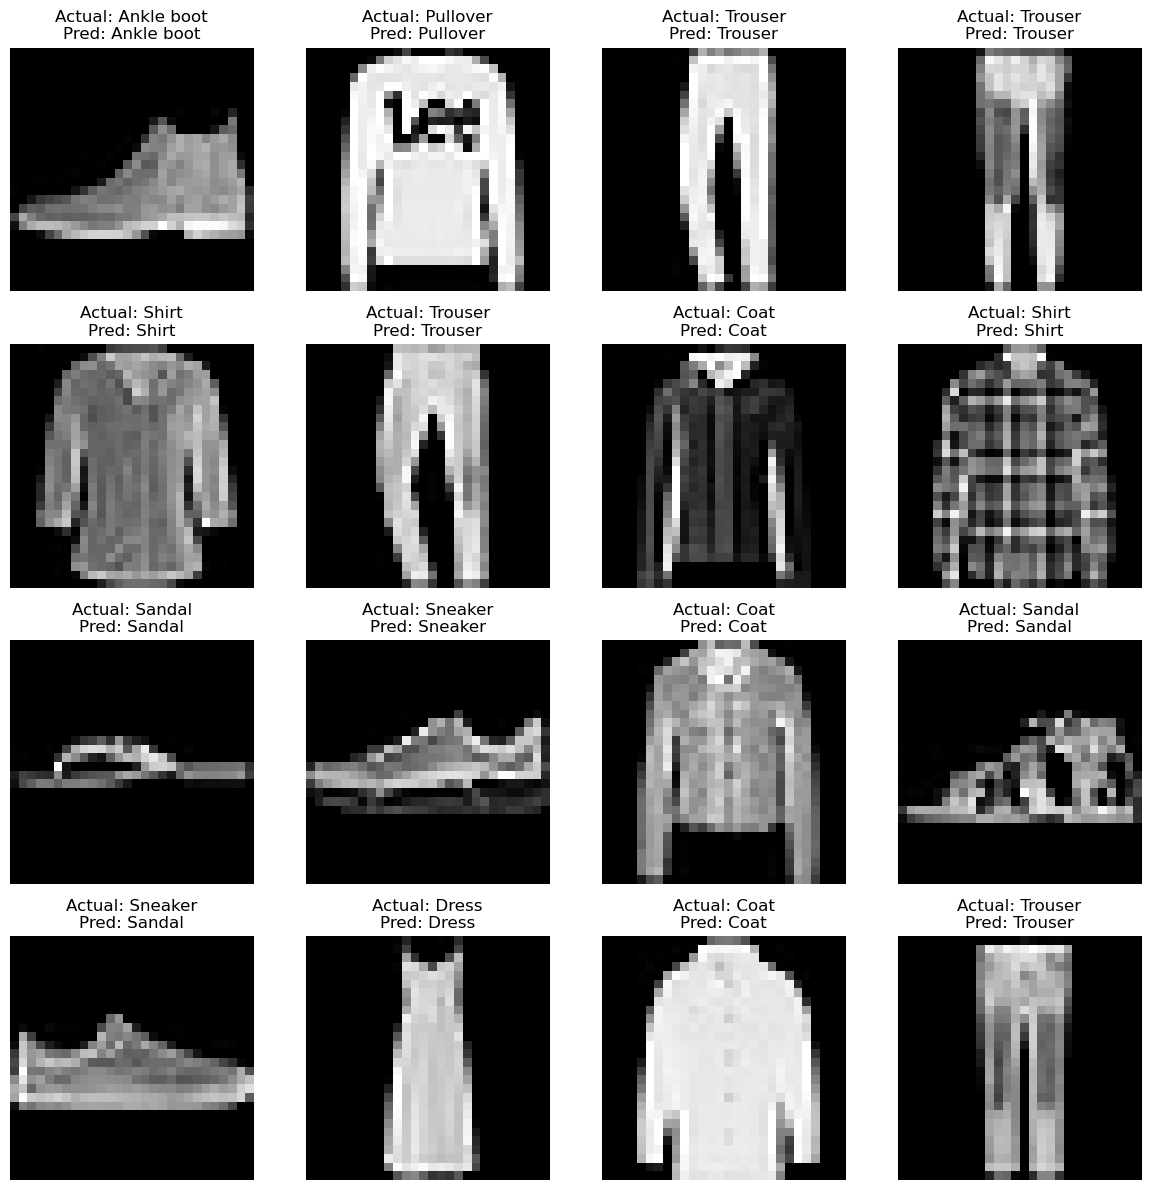

In [14]:
predictions = dropout_model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]

plt.figure(figsize=(12, 12))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Actual: {class_names[y_test[i]]}\nPred: {class_names[predicted_labels[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()